In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tesla = yf.download('TSLA')
tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<h3>Rolling</h3>

In [3]:
tesla['Open:rollingBy3'] = tesla['Open'].rolling(window=3).max()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingBy3
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.719333
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.666667


In [9]:
# koyta NaN thkabe eita define kre dicchi
tesla['Open:rollingBy3'] = tesla['Open'].rolling(window=3,min_periods=2).max()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingBy3
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.719333
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.666667


<h2>Moving Avarage</h2>

<h3>Simple Moving Avarage</h3>

In [10]:
tesla['Open:rollingMeanBy10'] = tesla['Open'].rolling(window=10).mean()
tesla['Open:rollingMeanBy30'] = tesla['Open'].rolling(window=30).mean()
tesla['Open:rollingMeanBy50'] = tesla['Open'].rolling(window=50).mean()

<Axes: xlabel='Date'>

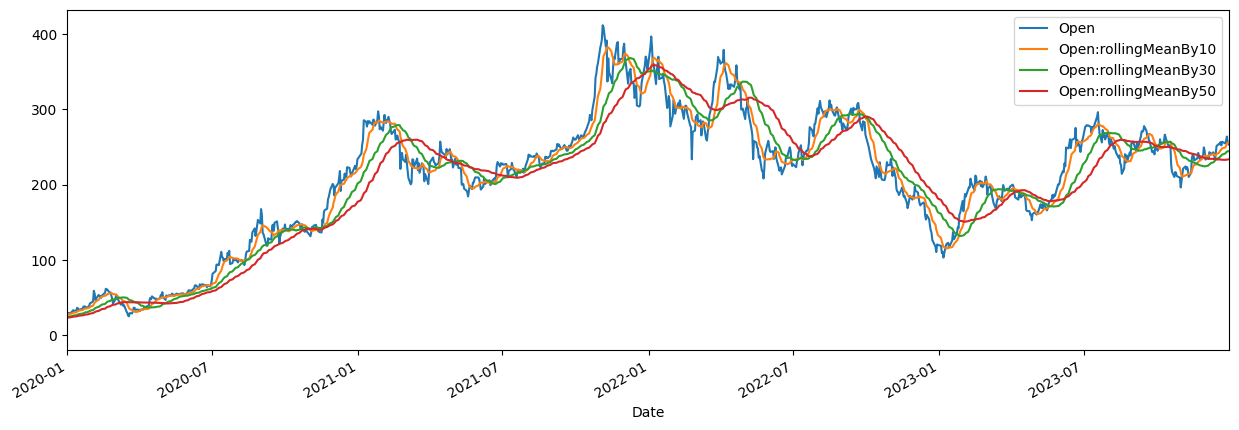

In [27]:
columns = ['Open','Open:rollingMeanBy10','Open:rollingMeanBy30','Open:rollingMeanBy50']
tesla[columns].plot(xlim=['2020-01-01','2023-12-31'],figsize=(15,5))

<h3>Cumulative Moving Avarage</h3>

In [14]:
tesla['Open:CMA'] = tesla['Open'].expanding().mean()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingBy3,Open:rollingMeanBy10,Open:rollingMeanBy30,Open:rollingMeanBy50,Open:CMA
Date,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333,NaN,NaN,NaN,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333,NaN,NaN,NaN,1.550889
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.719333,NaN,NaN,NaN,1.546500
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.666667,NaN,NaN,NaN,1.503867


<Axes: xlabel='Date'>

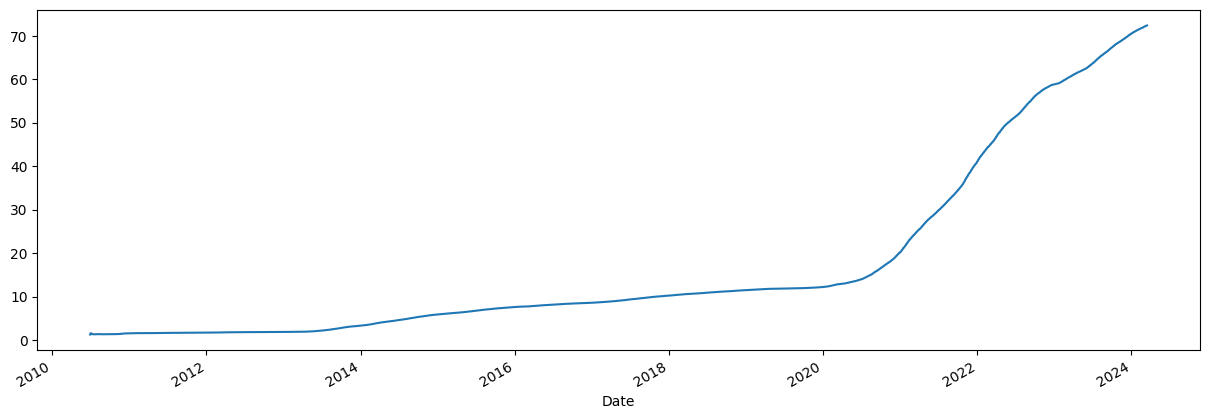

In [16]:
tesla['Open:CMA'].plot(figsize=(15,5))

<h3>Exponential Moving Avarage</h3>

In [17]:
tesla['Open:EMA_0.1'] = tesla['Open'].ewm(alpha=0.1,adjust=False).mean()
tesla['Open:EMA_0.3'] = tesla['Open'].ewm(alpha=0.3,adjust=False).mean()
tesla['Open:EMA_0.5'] = tesla['Open'].ewm(alpha=0.5,adjust=False).mean()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingBy3,Open:rollingMeanBy10,Open:rollingMeanBy30,Open:rollingMeanBy50,Open:CMA,Open:EMA_0.1,Open:EMA_0.3,Open:EMA_0.5
Date,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,1.266667,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333,NaN,NaN,NaN,1.493000,1.311934,1.402467,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333,NaN,NaN,NaN,1.550889,1.347407,1.481727,1.579834
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.719333,NaN,NaN,NaN,1.546500,1.366000,1.497209,1.556583
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.666667,NaN,NaN,NaN,1.503867,1.362733,1.448046,1.444958


<Axes: xlabel='Date'>

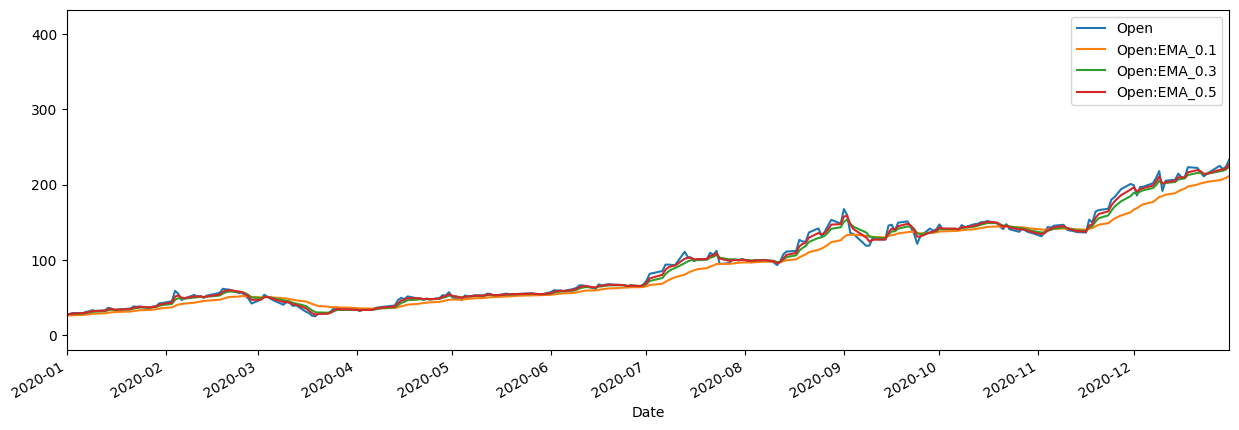

In [25]:
columns=['Open','Open:EMA_0.1','Open:EMA_0.3','Open:EMA_0.5']
tesla[columns].plot(xlim=['2020-01-01','2020-12-31'],figsize=(15,5))

<h3>Exponential weighted Moving Avarage</h3>

In [20]:
tesla['Open:EWMA_5days'] = tesla['Open'].ewm(span=5).mean()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingBy3,Open:rollingMeanBy10,Open:rollingMeanBy30,Open:rollingMeanBy50,Open:CMA,Open:EMA_0.1,Open:EMA_0.3,Open:EMA_0.5,Open:EWMA_5days
Date,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,1.266667,1.266667,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333,NaN,NaN,NaN,1.493000,1.311934,1.402467,1.493000,1.538267
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333,NaN,NaN,NaN,1.550889,1.347407,1.481727,1.579834,1.599088
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.719333,NaN,NaN,NaN,1.546500,1.366000,1.497209,1.556583,1.571774
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.666667,NaN,NaN,NaN,1.503867,1.362733,1.448046,1.444958,1.480240


<Axes: xlabel='Date'>

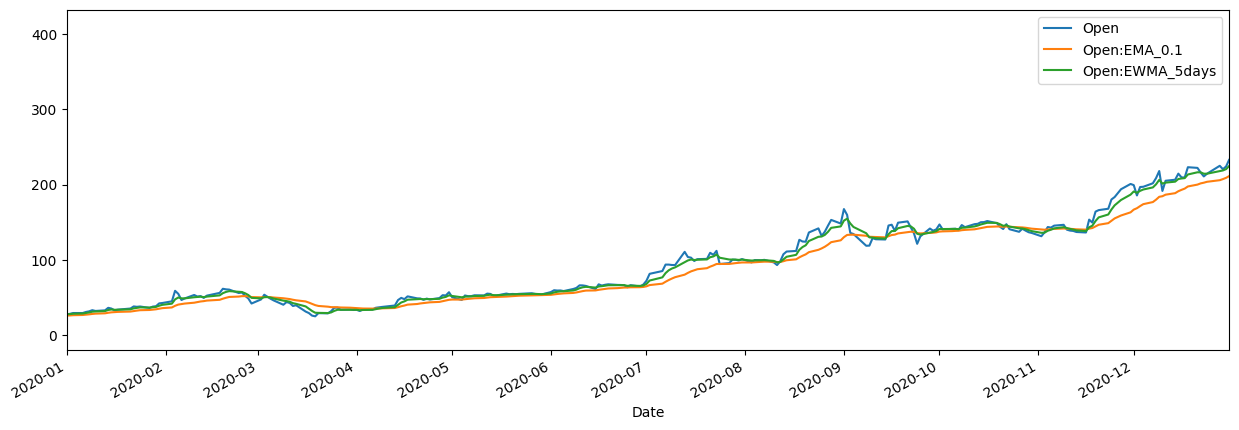

In [24]:
columns=['Open','Open:EMA_0.1','Open:EWMA_5days']
tesla[columns].plot(xlim=['2020-01-01','2020-12-31'],figsize=(15,5))